# Loading data

In [0]:
ml_dat = spark.table('mdpf_joined_dat.ml_data')

# Preparing Data

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, RandomForestClassificationModel
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.sql.types import DoubleType

In [0]:
training_dat = ml_dat.filter((ml_dat.state == '06') | (ml_dat.state == '36') | (ml_dat.state == '48')) # codes from https://www.mercercountypa.gov/dps/state_fips_code_listing.htm # 6 - California 36 - New York 48 - Texas

test_dat = ml_dat.filter((ml_dat.state == '12') | (ml_dat.state == '25') ) 
# codes from https://www.mercercountypa.gov/dps/state_fips_code_listing.htm 

In [0]:
n = training_dat.count()

tract_noev = training_dat.filter(training_dat.isev == 0).count()

print(round(tract_noev / n, 2), "- Percent of Tracts with no ev chargers:")
print(round(1 - round(tract_noev / n, 2),2), "- Tracts with ev chargers")

0.71 - Percent of Tracts with no ev chargers:
0.29 - Tracts with ev chargers


In [0]:
training_dat.count()

Out[4]: 18240

In [0]:
test_dat.count()

Out[5]: 5723

In [0]:
training_dat.summary().display()

summary,tractcode,state,people_travel_to_work,square_miles,total_tract_population,pop_density,transport_station_counts,work_travel_perc,median_gas_dwell_time,gas_stations_per_tract,count_other_tracts,total_visit_counts,public_transportion_perc,perc_nonwhite,some_diversity,isev,NonResidentialUse_count_Ammon,Med_travelDist_toTract,most_frequent_naics_code,car_rental_per_tract,house_hold_income_plus_100000,Average_Years_of_Edcuation_by_tract,total_starbucks_by_tract,subway_avg_daily_traffic,Number_of_Schools,count_fam_homes,count_non_fam_homes,count_walgreens,population_per_gas_station,public_trans_NA,public_trans_bus,public_trans_subway,public_trans_train,public_trans_trolley,public_trans_ferry,taxi,motorcycle,bicycle,walked,car_truck_or_van,work_from_home,car_truck_or_van_alone,car_truck_or_van_carpool,car_truck_or_van_carpool_2_person,car_truck_or_van_3_person,car_truck_or_van_4_person,car_truck_or_van_5_6_person,car_truck_or_van_7_more_person
count,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240,18240
mean,2.631885794538158E10,26.21217105263158,1790.2285635964913,25.451798245614068,4776.133333333333,11359.918585526315,0.05740131578947368,0.36327960526315217,8.92831030701756,2.059594298245614,3370.9247807017546,595646.5274671053,0.03942739927903129,34.41740422174105,0.91875,0.2857456140350877,0.002905701754385965,5.531568038488542,696.3918859649123,0.14605263157894738,191.6592105263158,14.964996632845175,0.22905701754385965,1.3276919715235203,1.738267543859649,2538.6709978070176,1071.9560307017543,0.14451754385964913,1486.1065789473685,203.15274122807017,69.1844298245614,110.38475877192982,19.79205043859649,2.3151315789473683,1.4763706140350876,5.776370614035088,4.571875,14.843969298245614,68.38788377192982,1788.734923245614,21.85202850877193,117.33996710526316,1583.215076754386,205.51984649122807,152.08262061403508,31.009155701754388,12.184100877192982,6.550274122807018
stddev,1.8589203518787914E10,18.52922985776812,1232.6585487772768,157.17406056849325,2645.728443894806,20407.882845131913,0.2654203954358211,0.12432199235651983,17.995762847729427,2.7091620920620874,3775.070473170723,900687.459945673,0.08925375734243782,24.593033867128444,0.2732261522845693,0.451781194972005,0.08339458904273288,14.412655899588005,117.50258247815563,0.5977513187281724,439.22821885562314,2.188062071460372,0.6104612706144517,4.10591969626171,2.220856844525693,1464.3931463062556,843.6330261157717,0.7519571391646147,2040.558318166588,437.3034793458974,127.90388279338529,360.3514425003993,69.2693677760645,14.388377926602729,14.735654924568477,21.93848321231017,12.160791487445632,42.51524074143916,173.7094168311639,1233.3816751811796,39.9722391364495,125.52190183613466,1110.5548733495502,173.14577512865347,129.51636314080227,43.19893904244873,26.34068256819828,18.84822103218628
min,06001400100,06,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6.065040606E9,6.0,996.0,0.39,3169.0,1435.0,0,0.32,0.0,0,1259,139388.0,0.0,14.41172073553596,1,0,0,0.8761333810546409,621.0,0,0,13.942029004140334,0,0.0,0,1644.0,522.0,0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,994.0,0.0,38.0,867.0,89.0,63.0,0.0,0.0,0.0
50%,3.6043011001E10,36.0,1653.0,0.92,4412.0,4892.0,0,0.39,7.23,1,2400,318663.0,0.0,28.63509749303621,1,0,0,3.3224717648930246,722.0,0,0,15.13480536383269,0,0.0,1,2340.0,872.0,0,810,42.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,1652.0,9.0,82.0,1460.0,165.0,122.0,17.0,0.0,0.0
75%,4.8061011801E10,48.0,2356.0,3.17,5865.0,10521.0,0,0.44,10.4,3,4154,700803.0,0.02687472908539228,51.07967237527923,1,1,0,6.1633808558021155,722.0,0,151,16.25913913426878,0,0.0,3,3169.0,1384.0,0,2195,163.0,82.0,14.0,9.0,0.0,0.0,0.0,0.0,14.0,70.0,2355.0

In [0]:
test_dat.summary().display()

summary,tractcode,state,people_travel_to_work,square_miles,total_tract_population,pop_density,transport_station_counts,work_travel_perc,median_gas_dwell_time,gas_stations_per_tract,count_other_tracts,total_visit_counts,public_transportion_perc,perc_nonwhite,some_diversity,isev,NonResidentialUse_count_Ammon,Med_travelDist_toTract,most_frequent_naics_code,car_rental_per_tract,house_hold_income_plus_100000,Average_Years_of_Edcuation_by_tract,total_starbucks_by_tract,subway_avg_daily_traffic,Number_of_Schools,count_fam_homes,count_non_fam_homes,count_walgreens,population_per_gas_station,public_trans_NA,public_trans_bus,public_trans_subway,public_trans_train,public_trans_trolley,public_trans_ferry,taxi,motorcycle,bicycle,walked,car_truck_or_van,work_from_home,car_truck_or_van_alone,car_truck_or_van_carpool,car_truck_or_van_carpool_2_person,car_truck_or_van_3_person,car_truck_or_van_4_person,car_truck_or_van_5_6_person,car_truck_or_van_7_more_person
count,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723
mean,1.541498736352787E10,15.357330071640748,1927.1175956666084,10.737109907391254,4849.237987069719,4976.748208981304,0.047527520531189936,0.381548139087896,9.31690546915953,2.1686178577669053,4431.746811113053,720687.9535208807,0.01867368490012586,23.077367309309285,0.8586405731259829,0.27730211427572954,0.005242005940940066,6.448214674249263,680.7648086667832,0.20915603704350866,168.2091560370435,15.26109377960539,0.16127904944958937,1.3947613632138858,1.8642320461296522,2640.875939192731,1292.2795736501835,0.26804123711340205,1647.5194827887472,94.08090162502184,46.95579241656474,32.198846758692994,12.652804473178403,1.4775467412196401,0.7959112353660668,5.304910012231347,4.628167045255984,15.286388257906692,54.05521579591124,1927.1175956666084,25.52402586056264,132.9837497815831,1729.624322907566,197.49327275904247,151.78123361873145,27.441551633758518,10.02883103267517,5.074960684955443
stddev,5.666464147646032E9,5.690279735472586,1256.2602967599225,46.39024860131153,2772.9153552911584,7357.893413242042,0.23908267046408524,0.10915109144352941,17.08955392395582,2.545300298961511,5766.796808328172,1453515.6358383144,0.04885824878453789,20.775816249371637,0.3484223753371805,0.4477060144793471,0.12669179481769915,27.661236362791172,131.5408571683729,0.9044377970355728,385.70268394903815,2.3714424709796122,0.539612181824605,4.183860921490107,19.733843790679913,1614.3314203173081,792.7090562084286,3.9634123768595786,2142.6657688718105,204.92207432000103,97.40057336035815,133.31799380271724,43.80460714999307,11.87228042227227,13.106010000531366,15.99289279861285,13.801057785295429,37.85893722577682,130.53404579444407,1256.2602967599225,41.82131362187348,134.321293833326,1137.1821281753553,168.5902101141928,130.82615589455557,42.642202420863654,25.133673536067413,18.247295585968477
min,12001000200,12,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.2057013504E10,12.0,1100.0,0.68,3134.0,1029.0,0,0.33,0.0,0,1304,158517.0,0.0,7.805325987144174,1,0,0,0.0,621.0,0,0,14.579778261823387,0,0.0,0,1658.0,760.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100.0,0.0,47.0,971.0,85.0,63.0,0.0,0.0,0.0
50%,1.20970415E10,12.0,1747.0,1.46,4473.0,2898.0,0,0.4,7.42,1,2620,389078.0,0.0,16.791550058680148,1,0,0,3.566670643442297,722.0,0,0,15.451399438727265,0,0.0,1,2424.0,1154.0,0,981,19.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1747.0,12.0,100.0,1565.0,160.0,122.0,12.0,0.0,0.0
75%,2.50010145E10,25.0,2525.0,4.42,6094.0,5676.0,0,0.46,10.5,3,5267,866151.0,0.013245033112582783,31.261730969760173,1,1,0,6.187614332299371,722.0,0,107,16.363525779596262,0,0.0,2,3357.0,1660.0,0,2375,86.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,54.0,2525.0,34.0,179.0,2270.0,262.0,204.0,38.0,1

In [0]:
col_dat.count()

tract_noev = col_dat.filter(col_dat.isev == 0).count()

print(tract_noev, "- Tracts with no ev chargers:")
print(col_dat.count() - tract_noev, "- Tracts with ev chargers")

795 - Tracts with no ev chargers:
454 - Tracts with ev chargers


In [0]:
# split the data into training and test sets
training, testing = training_dat.randomSplit([0.8, 0.2], seed=44)

In [0]:
stages = [] # will be appended to for use in the pipeline.

# set type of each column
#categoricalColumns = ['some_diversity','most_frequent_naics_code']
numericCols = ['people_travel_to_work','square_miles', 'total_tract_population', 'pop_density', 'transport_station_counts', 'work_travel_perc', 'median_gas_dwell_time', 'gas_stations_per_tract', 'count_other_tracts', 'total_visit_counts','public_transportion_perc','perc_nonwhite','NonResidentialUse_count_Ammon','Med_travelDist_toTract','car_rental_per_tract','Average_Years_of_Edcuation_by_tract','total_starbucks_by_tract','subway_avg_daily_traffic','Number_of_Schools','count_fam_homes','count_non_fam_homes','count_walgreens','population_per_gas_station','public_trans_NA','public_trans_bus','public_trans_subway','public_trans_train','public_trans_trolley','public_trans_ferry','taxi','motorcycle','bicycle','walked','car_truck_or_van','work_from_home','car_truck_or_van_alone','car_truck_or_van_carpool','car_truck_or_van_carpool_2_person','car_truck_or_van_3_person','car_truck_or_van_4_person','car_truck_or_van_5_6_person','car_truck_or_van_7_more_person']
#'house_hold_income_plus_100000'


# type cast all the numeric columns
for col in numericCols:
    dat = training_dat.withColumn(col, training_dat[col].cast(DoubleType()))
    
# one-hot encode the categorical columns
#stringIndexer = StringIndexer(inputCols=categoricalColumns, outputCols=[x + "Index" for x in categoricalColumns]) 
#encoder = OneHotEncoder(inputCols=stringIndexer.getOutputCols(), outputCols=[x + "OHE" for x in categoricalColumns]) 

# string index the label (target) column
label_stringIdx = StringIndexer(inputCol = 'isev', outputCol = 'label')

# vector assemble all numeric and categorical columns into one vector
featureInputs = numericCols
assembler = VectorAssembler(inputCols=featureInputs, outputCol="features")


# create RF Classifier
# https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html
rf = RandomForestClassifier(labelCol="label"
                            , featuresCol="features"
                            , numTrees=15
                            , maxDepth=15
                           )

In [0]:
pipeline = Pipeline(stages=[label_stringIdx, assembler, rf])
pipelineModel = pipeline.fit(training)
predDF = pipelineModel.transform(testing)
col_predDF = pipelineModel.transform(col_dat)

# Evaluating Model Performance

In [0]:
predDF.select('tractcode', 'label', 'features', 'rawPrediction', 'prediction', 'probability').show(25)
#predDF.show()

+-----------+-----+--------------------+--------------------+----------+--------------------+
|  tractcode|label|            features|       rawPrediction|prediction|         probability|
+-----------+-----+--------------------+--------------------+----------+--------------------+
|06001400200|  0.0|[546.0,0.23,2007....|[7.85714285714285...|       0.0|[0.52380952380952...|
|06001400800|  0.0|[1097.0,0.27,4069...|[11.8039747064137...|       0.0|[0.78693164709424...|
|06001401000|  0.0|[1448.0,0.44,6133...|[6.98451612903225...|       1.0|[0.46563440860215...|
|06001401100|  0.0|[714.0,0.34,4287....|[6.12380952380952...|       1.0|[0.40825396825396...|
|06001401200|  1.0|[951.0,0.26,2619....|[6.55340909090909...|       1.0|[0.43689393939393...|
|06001403300|  1.0|[770.0,0.35,4178....|           [5.1,9.9]|       1.0|[0.33999999999999...|
|06001403400|  1.0|[1018.0,0.26,4340...|[5.81549051055867...|       1.0|[0.38769936737057...|
|06001403702|  1.0|[656.0,0.08,1930....|[4.97284798534798...

In [0]:
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.BinaryClassificationEvaluator.html
evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")
accuracy = evaluator.evaluate(predDF)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

Accuracy = 0.7796189221606302
Test Error = 0.22038107783936978


Out[51]: [<matplotlib.lines.Line2D at 0x7f56f5c60e20>]

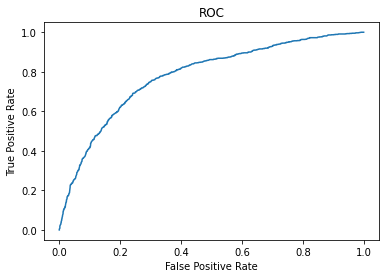

In [0]:
# Code from Kody
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt

class CurveMetrics(BinaryClassificationMetrics):
    def _init_(self, *args):
        super(CurveMetrics, self)._init_(*args)
    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter,
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2,
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points
    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)
preds = predDF.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')
plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(x_val, y_val)

In [0]:
# From Kody as well
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.evaluation.MulticlassMetrics.html#multiclassmetrics

from sklearn.metrics import classification_report,confusion_matrix
import pyspark.pandas
import matplotlib.pyplot as plt
from pyspark.mllib.evaluation import MulticlassMetrics,MultilabelMetrics

results = predDF.select(['prediction','label'])
predictionAndLabels = results.rdd
metrics = MulticlassMetrics(predictionAndLabels)

cm = metrics.confusionMatrix().toArray()
aoc = BinaryClassificationEvaluator(metricName="areaUnderROC").evaluate(predDF)
accuracy = metrics.accuracy
precision_0 = metrics.precision(0.0)
precision_1 = metrics.precision(1.0)
f1Score_0 = metrics.fMeasure(0.0)
f1Score_1 = metrics.fMeasure(1.0)
recall_0 = metrics.recall(0.0)
recall_1 = metrics.recall(1.0)
print(f'Area Under ROC Curve: {aoc:.2%}')
print(f'Accuracy: {accuracy:.2%}.')
print(f'Precision on 0s: {precision_0:.2%}.')
print(f'Precision on 1s: {precision_1:.2%}.')
print(f'F1Score on 0s: {f1Score_0:.2%}.')
print(f'F1Score on 1s: {f1Score_1:.2%}.')
print(f'Recall on 0s: {recall_0:.2%}.')
print(f'Recall on 1s: {recall_1:.2%}.')

Area Under ROC Curve: 77.96%
Accuracy: 76.70%.
Precision on 0s: 80.12%.
Precision on 1s: 61.75%.
F1Score on 0s: 84.85%.
F1Score on 1s: 49.65%.
Recall on 0s: 90.17%.
Recall on 1s: 41.51%.


In [0]:
cm

Out[65]: array([[2402.,  262.],
       [ 596.,  423.]])

## Feature Importance Table

In [0]:
pipeline = Pipeline(stages=[label_stringIdx, assembler, rf])
pipelineModel = pipeline.fit(training)
predDF = pipelineModel.transform(testing)
col_predDF = pipelineModel.transform(col_dat)

In [0]:
# predDF = pipelineModel.transform(testDF)
import pandas as pd

dtm = pipelineModel.stages[-1]
importances = dtm.featureImportances.toArray()
nnames = predDF.select("features").schema[0].metadata.get('ml_attr').get('attrs').get('numeric') 

fi_dat = pd.DataFrame(nnames).assign(values = importances).sort_values("values", ascending = False)
#fi_dat = fi_dat['values'].round(3)
fi_dat[['name', 'values']].head(10)

,name,values
8,count_other_tracts,0.126859
9,total_visit_counts,0.080094
13,Med_travelDist_toTract,0.044946
15,Average_Years_of_Edcuation_by_tract,0.043122
20,count_non_fam_homes,0.041167
1,square_miles,0.032012
32,walked,0.031049
0,people_travel_to_work,0.029956
35,car_truck_or_van_alone,0.028783
22,population_per_gas_station,0.025931
